# Call dataset

In [26]:
import pandas as pd
import os
import matplotlib.pylab as plt

path=input('Enter directory with customer churn Data files')
os.chdir(path)
ccdata=pd.read_csv('BankChurners.csv')
ccdata.head()

Enter directory with customer churn Data filesC:\Users\susan\OneDrive\桌面\Purdue Documents\Courses & Enrollment\MGMT 58600-B03 LEC - Python Programming\4. Final Project


,CLIENTNUM,Attrition_Flag,Customer_Age,Customer_Age_2,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,710926383.0,Existing Customer,32.0,30-34,F,2.0,Post-Graduate,Married,$40K - $60K,Blue,...,1553,1177.0,376.0,0.638,4549.0,68.0,0.659,0.758,0.000128,0.99987
1,822959133.0,Existing Customer,32.0,30-34,F,3.0,Post-Graduate,Married,$40K - $60K,Blue,...,3174,2084.0,1090.0,0.636,4508.0,83.0,1.075,0.657,0.000369,0.99963
2,716198358.0,Existing Customer,33.0,30-34,F,4.0,Post-Graduate,Married,$40K - $60K,Blue,...,2372,1887.0,485.0,0.800,1852.0,55.0,0.618,0.796,0.000236,0.99976
3,708171858.0,Existing Customer,33.0,30-34,F,3.0,Post-Graduate,Married,$40K - $60K,Blue,...,1864,1081.0,783.0,1.416,2607.0,44.0,1.750,0.580,0.000234,0.99977
4,789347133.0,Existing Customer,38.0,35-39,F,2.0,Post-Graduate,Married,$40K - $60K,Blue,...,4468,2395.0,2073.0,0.706,4690.0,79.0,0.756,0.536,0.000039,0.99996


# TRIANGLE CORRELATION HEATMAP

<ipython-input-27-d9e3b62b5adf>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

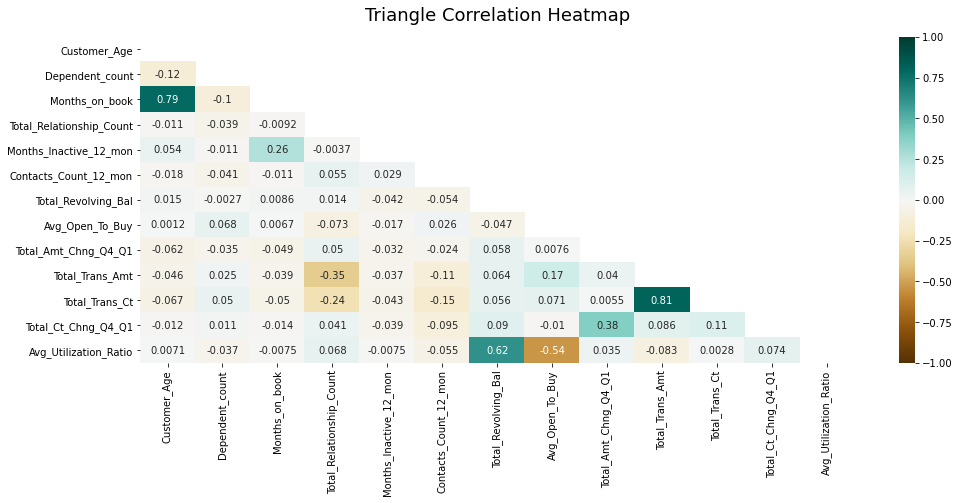

In [27]:
import seaborn as sns
dataframe=pd.read_csv('BankChurners.csv')[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# EDA1. There are 4% more female customers than male customers, yet 14% more of the attrited customers are female.​

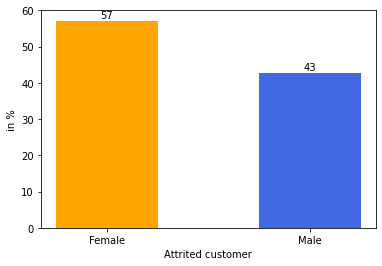

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ccdata=pd.read_csv('BankChurners.csv')
obj = ccdata.groupby(['Attrition_Flag','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
x=state_pcts.loc['Attrited Customer','F'][0]
y=state_pcts.loc['Attrited Customer','M'][0]

left = np.array(['Female','Male'])
height = np.array([x,y])
plt.xlabel('Attrited customer')
plt.ylabel('in %')

plt.bar(left, height,width=0.5,color=['orange','royalblue'])
for a,b in zip(left,height):  
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.show()

# EDA1. There are 4% more female customers than male customers, yet 14% more of the attrited customers are female.​

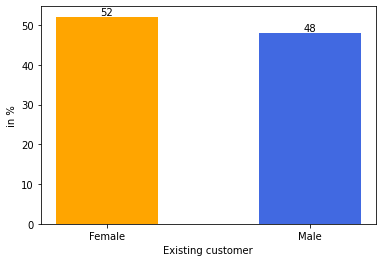

In [8]:
obj = ccdata.groupby(['Attrition_Flag','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
x=state_pcts.loc['Existing Customer','F'][0]
y=state_pcts.loc['Existing Customer','M'][0]

left = np.array(['Female','Male'])
height = np.array([x,y])
plt.xlabel('Existing customer')
plt.ylabel('in %')

plt.bar(left, height,width=0.5,color=['orange','royalblue'])
for a,b in zip(left,height):  
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.show()

# EDA2. Unlike male customers, almost 90% of female customers have less than $10K of credit limit.

<AxesSubplot:ylabel='Credit limit'>

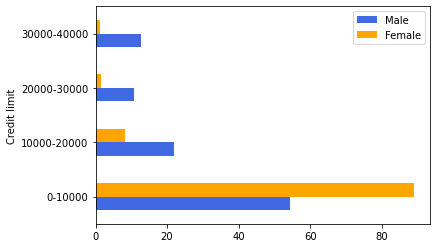

In [33]:
Credit_limit = ['0-10000', '10000-20000', '20000-30000', '30000-40000']

ccdata['CL_bin']=pd.cut(ccdata.Credit_Limit,bins=[0,10000,20000,30000,40000],labels=Credit_limit)
obj=ccdata.groupby(['CL_bin','Gender']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

Male = list(a[a.Gender=='M']['CLIENTNUM'])
Female = list(a[a.Gender=='F']['CLIENTNUM'])

df = pd.DataFrame(
    {'Credit limit': Credit_limit,
     'Female': Female,
     'Male': Male,
    })

df.plot(x="Credit limit", y=["Male","Female"], kind="barh",color=['royalblue','orange'])

# EDA3. Every additional customer contact increases the likelihood to churn by 12%.

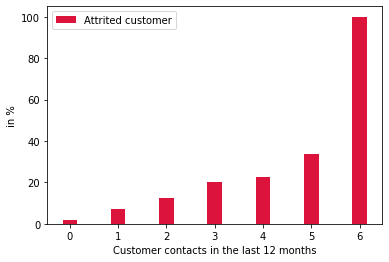

In [22]:
plt.xlabel('Customer contacts in the last 12 months')
plt.ylabel('in %')

a=list(ccdata.Contacts_Count_12_mon.value_counts().index)
bar_width=0.3 
tick_label=a.sort()
x=np.arange(7)
obj=ccdata.groupby(['Contacts_Count_12_mon','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()
attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])

plt.bar(x,attrited,bar_width,color='crimson',label='Attrited customer')

plt.legend()
plt.xticks(x,tick_label)
plt.show()

# EDA4. There is close to a 25% drop in the average transaction amount for attrited platinum card customers.

<AxesSubplot:ylabel='Card level'>

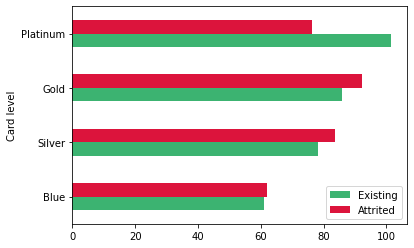

In [15]:
ccdata['Average_amount_per_transaction']=ccdata['Total_Trans_Amt']/ccdata['Total_Trans_Ct']
obj = ccdata.groupby(['Attrition_Flag','Card_Category']).agg({'Average_amount_per_transaction': 'mean'})

state_pcts = obj.groupby(level=1).apply(lambda x:x)
x1=state_pcts.loc['Attrited Customer','Platinum'][0]
y1=state_pcts.loc['Attrited Customer','Gold'][0]
z1=state_pcts.loc['Attrited Customer','Silver'][0]
w1=state_pcts.loc['Attrited Customer','Blue'][0]
x2=state_pcts.loc['Existing Customer','Platinum'][0]
y2=state_pcts.loc['Existing Customer','Gold'][0]
z2=state_pcts.loc['Existing Customer','Silver'][0]
w2=state_pcts.loc['Existing Customer','Blue'][0]

Card_level = ['Blue', 'Silver', 'Gold', 'Platinum']
Attrited = [w1,z1,y1,x1]
Existing = [w2,z2,y2,x2]

df = pd.DataFrame(
    {'Card level': Card_level,
     'Attrited': Attrited,
     'Existing': Existing
    })

df.plot(x="Card level", y=["Existing","Attrited"], kind="barh",color=['mediumseagreen','crimson'])

# EDA5. Customers with less than 3 relationships are almost 2 times more likely to churn.

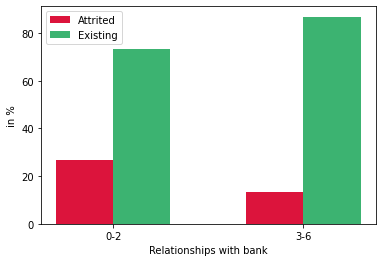

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('Relationships with bank')
plt.ylabel('in %')

tick_label=['0-2','3-6']

ccdata['Rl_bin']=pd.cut(ccdata.Total_Relationship_Count,bins=[0,2,6],labels=tick_label)
obj=ccdata.groupby(['Rl_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

x=np.arange(2)
attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])
bar_width=0.3
plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
plt.show()

# EDA6. 30 out of 100 customers are likely to churn if their revolving balance is below $1K.

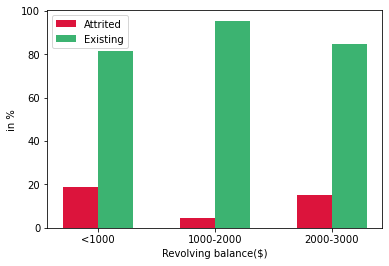

In [23]:
plt.xlabel('Revolving balance($)')
plt.ylabel('in %')
x=np.arange(3)
bar_width=0.3
tick_label=['<1000','1000-2000','2000-3000']

ccdata['Rb_bin']=pd.cut(ccdata.Total_Revolving_Bal,bins=[0,1000,2000,3000],labels=tick_label)
obj=ccdata.groupby(['Rb_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
    
plt.show()

# EDA7. People at the extremes of average utilization ratio have higher percentages of attrition rate.

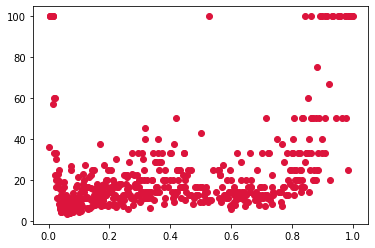

In [16]:
obj=ccdata.groupby(['Avg_Utilization_Ratio','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()
aver_util=list(a[a.Attrition_Flag=='Attrited Customer']['Avg_Utilization_Ratio'])
attrition=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
fig = plt.figure()   

ax = fig.add_subplot(1, 1, 1)

ax.scatter(aver_util, attrition, color='crimson')
plt.show() 

# Insight1. 30 out of 100 customers are likely to churn if their revolving balance is below $1K.

In [ ]:
plt.xlabel('Revolving balance($)')
plt.ylabel('in %')
x=np.arange(3)
bar_width=0.3
tick_label=['<1000','1000-2000','2000-3000']

ccdata['Rb_bin']=pd.cut(ccdata.Total_Revolving_Bal,bins=[0,1000,2000,3000],labels=tick_label)
obj=ccdata.groupby(['Rb_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

plt.bar(x,attrited,bar_width,color='crimson',label='Attrited')
plt.bar(x+bar_width,existing,bar_width,color='mediumseagreen',label='Existing')

plt.legend()
plt.xticks(x+bar_width/2,tick_label)
    
plt.show()

# Insight2. There are no attrited customers that have made more than 100 transactions.​

<AxesSubplot:ylabel='Trans count'>

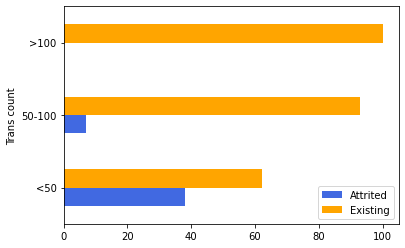

In [40]:
Trans_Cnt = ['<50', '50-100', '>100']

ccdata['TC_bin']=pd.cut(ccdata.Total_Trans_Ct,bins=[0,50,100,150],labels=Trans_Cnt)
obj=ccdata.groupby(['TC_bin','Attrition_Flag']).agg({'CLIENTNUM': 'count'})
state_pcts = obj.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
a=state_pcts.reset_index()

attrited=list(a[a.Attrition_Flag=='Attrited Customer']['CLIENTNUM'])
existing=list(a[a.Attrition_Flag=='Existing Customer']['CLIENTNUM'])

df = pd.DataFrame(
    {'Trans count': Trans_Cnt,
     'Attrited': attrited,
     'Existing': existing,
    })

df.plot(x='Trans count', y=["Attrited","Existing"], kind="barh",color=['royalblue','orange'])